In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [2]:
def selfload(namefile): 
    return np.loadtxt(namefile)

In [3]:
self = selfload('../data/Self_energy_fill_0.975_Im.txt')


In [4]:
def nonlintheta(ntheta) :
    return np.array([ np.pi/4.*(1.-np.cos(np.pi/2.*i/(ntheta-1.))) for i in range(ntheta) ]   )
def FSPatch(ntheta, nrad):
    def nonlinrad(i):
        return np.cos(np.pi/2. * (i+1.)/(nrad+1.))
    index = 1
    for nr in range(nrad):
        nt = np.rint(ntheta * nonlinrad(nr)**2)
        index  += 2* (nt if nt >1 else 2 )
    return int(index)

def find_zg(self,iQ,gd=3,fit=4):
    T = 0.08
    def fitFLproperties(nfit,deg):
        if deg > nfit: 
            print "overfitting?"
            return 
        x = np.array([T*np.pi*(2*i+1.) for i in range(nfit)])
        y = np.array([self[i,iQ]      for i in range(nfit)])
        return np.polyfit(x,y,deg)
    coeff = fitFLproperties(fit,gd)
    zk     =  1./(1.-coeff[-2])
    gk     =  coeff[-1]
    return zk, gk

0.753708642785


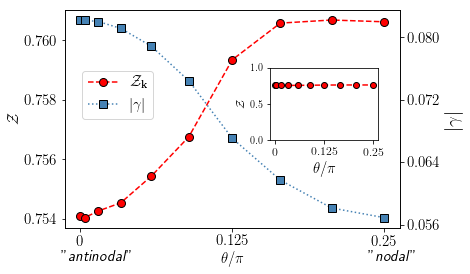

In [8]:
fs = 15
fig = plt.figure(facecolor ='w') 
ax1 = fig.add_subplot(111)
#ax1.set_ylim(0.5,1.)
ntheta=10
dg=2
fit=3
zet = ax1.plot(nonlintheta(ntheta),[find_zg(self,iQ,gd=dg,fit=fit)[0] for iQ in range(self.shape[1]-11,self.shape[1]-11+ntheta)],'-o',color='red',linestyle ='dashed',
         markeredgecolor= 'black',markersize=8.0,label=r"$\mathcal{Z}_\mathbf{k}$")
ax1.set_xlabel(r'$\theta/\pi$',fontsize=fs)
ax1.set_xticks(np.arange(0.,0.251*np.pi,0.125*np.pi))
ax1.set_xticklabels([r'$0$',r'$0.125$',r'$0.25$' ],fontsize=fs)
ax2=ax1.twinx()
gam = ax2.plot(nonlintheta(ntheta),[-find_zg(self,iQ,gd=dg,fit=fit)[1] for iQ in range(self.shape[1]-11,self.shape[1]-11+ntheta)],'-s',color='steelblue',linestyle ='dotted',
         markeredgecolor= 'black',markersize=8.0,label=r"$|\gamma |$")
fer = zet + gam
labs = [l.get_label() for l in fer ]
ax1.legend(fer, labs,fontsize=fs,loc=(0.05,0.5))
ax2.set_ylabel(r'$|\gamma|$',fontsize=fs+4)

ax3=plt.axes([0.6,0.43,0.25,0.25])
ax3.plot(nonlintheta(ntheta),[find_zg(self,iQ,gd=dg,fit=fit)[0] for iQ in range(self.shape[1]-11,self.shape[1]-11+ntheta)],'-o',color='red',linestyle ='dashed',
         markeredgecolor= 'black',markersize=6.0,label=r"$\mathcal{Z}$")
ax3.set_ylim(0,1.)
ax1.set_ylabel(r'$\mathcal{Z}$',fontsize=fs)
ax1.tick_params(labelsize=fs)
ax2.tick_params(labelsize=fs)
ax3.set_ylabel(r'$\mathcal{Z}$',fontsize=12)
ax3.set_xlabel(r'$\theta/\pi$',fontsize=fs)
ax3.set_xticks(np.arange(0.,0.251*np.pi,0.125*np.pi))
ax3.set_xticklabels([r'$0$',r'$0.125$',r'$0.25$' ],fontsize=12)
print ax1.get_ylim()[0]
#ax1.set_ylim([0.73,0.78])
ax1.text(-0.05,ax1.get_ylim()[0]-(ax1.get_ylim()[1]-ax1.get_ylim()[0])*0.15,r'"\textit{antinodal}"',fontsize=fs)
ax1.text(ax1.get_xlim()[1]*0.9,ax1.get_ylim()[0]-(ax1.get_ylim()[1]-ax1.get_ylim()[0])*0.15,r'"\textit{nodal}"',fontsize=fs)
#yticks1 = np.arange(ax1.get_ylim()[0]+(ax1.get_ylim()[1]-ax1.get_ylim()[0])/6.,ax1.get_ylim()[1]+(ax1.get_ylim()[1]-ax1.get_ylim()[0])/6.,(ax1.get_ylim()[1]-ax1.get_ylim()[0])/6.)
#ax1.set_yticks(yticks1 )
ax1.yaxis.set_major_locator(MaxNLocator(4))
ax2.yaxis.set_major_locator(MaxNLocator(4))
plt.savefig("../images/juppy/z_and_gamma975.png",dpi=300)
#ax2.legend(fontsize=fs,loc=(0.8,0.8))


In [201]:
original_mu= -0.1912841796875*4.0
def interacting_occ(gamma,temperature,t=1.0,tpri=-0.32,mu=original_mu): 
    def epsilon(k):return -2.*t*(np.cos(k[0])+np.cos(k[1]))-4.*tpri*np.cos(k[0])*np.cos(k[1]) - mu
    def fermi (eps,temp): return 1./(1.+np.exp(eps/temp))
    karray = np.array([[np.pi, ky] for ky  in  np.arange(0.0,np.pi,0.01)] )
    non = np.array([2.*fermi(epsilon(k),temperature)  for k in karray ] )
    inter = np.array([2.*fermi(epsilon(k),temperature-gamma/np.pi)  for k in karray ] )
    return non, inter    
    